In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
train_df= pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
a= train_df.copy()

In [6]:
train_df.shape

(891, 12)

In [7]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train_df= train_df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
for col in train_df.columns:
    if train_df[col].dtype=='object':
        train_df[col]=train_df[col].astype('category')

In [9]:
train_df.dtypes

Survived       int64
Pclass         int64
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

In [10]:
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
train_df.drop([61,829], inplace=True)
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


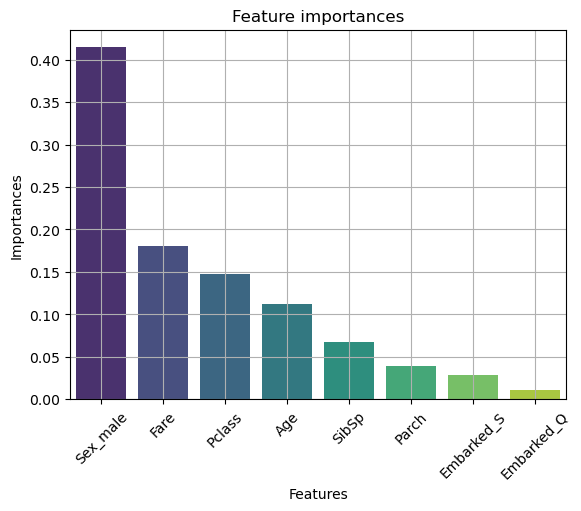

In [13]:
#Dropping irrlevent columns and encoding categorical columns
X= train_df.drop(['Survived'],axis=1)
X = pd.get_dummies(X, drop_first=True)
y= train_df['Survived']

#Filling missing values using median
X.fillna(X.median(),inplace=True)

#spilting the training and testing data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

#Training the model with the training data
model= RandomForestClassifier(n_estimators=215,bootstrap= True, criterion= 'gini', max_depth= 5, max_features= 'auto', random_state=42)
model.fit(X_train,y_train)

#obtaining the feature importances of different variables
importance= model.feature_importances_
features= X.columns

#making a dataframe about feature importances
d={'Features':features,'Importances':importance}
feature_importances_df= pd.DataFrame(d)
feature_importances_df= feature_importances_df.sort_values(by='Importances',ascending=False)

#plotting the feature importances
sns.barplot(data=feature_importances_df,x=feature_importances_df['Features'],y=feature_importances_df['Importances'],palette='viridis')
plt.title('Feature importances')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.ylabel('Importances')
plt.grid(True)
plt.show()

In [14]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8607594936708861
0.8089887640449438


### KNN and Logistic Regression

In [228]:
from sklearn.preprocessing import StandardScaler

X= train_df.drop(columns=['Survived'],axis=1)
y=train_df['Survived']

# Scaling numerical fetaures
columns_to_scale=['Age','Fare']
scaler= StandardScaler()
X[columns_to_scale]= scaler.fit_transform(X[columns_to_scale])

In [238]:
X_encoded= pd.get_dummies(X,drop_first=True)

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Train test split
x_train,x_test,y_train,y_test= train_test_split(X_encoded,y,random_state=42,test_size=0.2)

#Initializing models
knn= KNeighborsClassifier(n_neighbors=30)
lr= LogisticRegression(C=0.1,penalty= 'l2', solver= 'newton-cg')

In [324]:
knn.fit(x_train,y_train)
lr.fit(x_train,y_train)

knn_training_acc=knn.score(x_train,y_train)
knn_testing_acc=knn.score(x_test,y_test)
lr_training_acc=lr.score(x_train,y_train)
lr_testing_acc=lr.score(x_test,y_test)

print('knn training accuracy',knn_training_acc)
print('knn testing accuracy',knn_testing_acc)
print('lr training accuracy',lr_training_acc)
print('lr testing accuracy',lr_testing_acc)

knn training accuracy 0.8171589310829818
knn testing accuracy 0.8258426966292135
lr training accuracy 0.8045007032348804
lr testing accuracy 0.8033707865168539


In [250]:
accuracy={}
for i in range(1,51):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    accuracy[i]=knn.score(x_test,y_test)

<Axes: >

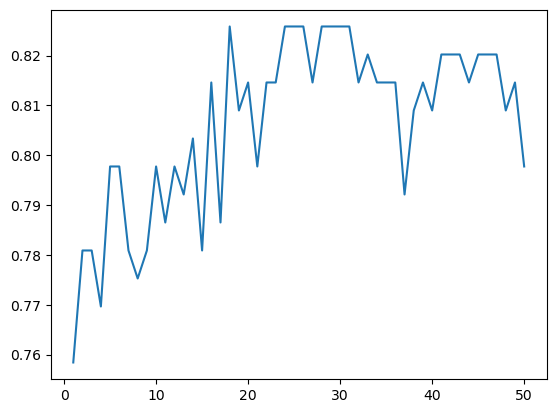

In [264]:
accuracy_series=pd.Series(accuracy)
accuracy_series.plot(kind='line')

In [43]:
#importing the orginal testing csv file provided
test_df= pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
#finding accuracy of test data obtained from training data csv file
X_test_imp= imputer.transform(X_test)
X_test_scaled= scaler.transform(X_test_imp)

score= cross_val_score(model,X_test_scaled,y_test,cv=5,scoring='accuracy')
score.mean()

0.8101587301587301

In [33]:
#Dropping irrelevant columns and encoding categorical columns in testing data file
X_test_df= test_df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)
X_test_df= pd.get_dummies(X_test_df,drop_first=True)
X_test_df.fillna(X_test_df.median(),inplace=True)

#Imputing the missing values again and scaling the testing data.
X_test_imputed= imputer.transform(X_test_df)
X_test_Scaled= scaler.transform(X_test_imputed)

#Training the model on training data again to ensure model is fit
model.fit(X_scaled,y)

#Finding out the predictions made by the model on new test data from testing data file
test_prediction= model.predict(X_test_Scaled)

#
submission_df= pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_prediction})
submission_df.to_csv('/kaggle/working/titanic_submission.csv', index=False)

print("Submission file created at '/kaggle/working/titanic_submission.csv'")

Submission file created at '/kaggle/working/titanic_submission.csv'


In [55]:
sub= pd.read_csv('/kaggle/working/titanic_submission.csv')
sub.set_index(sub['PassengerId'],inplace=True)
del sub['PassengerId']
sub.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0


In [56]:
gen=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
gen.rename(columns={'Survived': 'sur'}, inplace=True)
gen.set_index(gen['PassengerId'],inplace=True)
del gen['PassengerId']
gen.head()

,sur
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [57]:
result = sub.join(gen, how='inner')
print(result)

             Survived  sur
PassengerId               
892                 0    0
893                 0    1
894                 0    0
895                 1    0
896                 0    1
...               ...  ...
1305                0    0
1306                1    1
1307                0    0
1308                0    0
1309                1    0

[418 rows x 2 columns]


In [59]:
same_values =sub['Survived'] == gen['sur']

count_same = same_values.sum()
count_different = (~same_values).sum()

print(f"Count of same values: {count_same}")
print(f"Count of different values: {count_different}")

Count of same values: 343
Count of different values: 75


### ------------------------------------------------------------------------

In [300]:
train_df.dtypes

Survived       int64
Pclass         int64
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

In [302]:
num_cols= ['Age','Fare']
cat_cols= ['Pclass','Sex','SibSp','Parch','Embarked']

In [304]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

preprocessor=ColumnTransformer(
transformers=[
    ('num',StandardScaler(),num_cols),
    ('cat',OneHotEncoder(handle_unknown='ignore'),cat_cols)
]  )

pipeline= Pipeline(steps=[('preprocessor',preprocessor)])    


In [306]:
X= train_df.drop(columns=['Survived'],axis=1)
y=train_df['Survived']

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [310]:
X_train_transformed= pipeline.fit_transform(X_train)
X_test_transformed= pipeline.transform(X_test)

In [424]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

### 1. Best model selection

In [430]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

def evaluate(modelname):
    model = modelname
    model.fit(X_train_resampled,y_train_resampled)
    y_train_pred= model.predict(X_train_resampled)
    y_test_pred= model.predict(X_test_transformed)
    accuracy_train= accuracy_score(y_train_resampled,y_train_pred)
    accuracy_test= accuracy_score(y_test,y_test_pred)

    return accuracy_train,accuracy_test

models={
"Logistic Regression": LogisticRegression(max_iter=200),
"Decision Tree": DecisionTreeClassifier(),
"Random Forest": RandomForestClassifier(),
"SVM": SVC(),
"K-Nearest Neighbors": KNeighborsClassifier(),
"Gradient Boosting": GradientBoostingClassifier(),
"AdaBoost": AdaBoostClassifier(),
"XGBoost": XGBClassifier(eval_metric='mlogloss')
}

def model_evaluation(model_dict):
    model_names=model_dict.keys()
    model_list= list(model_dict.values())
    accuracy_scores_train=[]
    accuracy_scores_test=[]
    for i in model_list:
        accuracy_train,accuracy_test= evaluate(i)
        accuracy_scores_train.append(accuracy_train)
        accuracy_scores_test.append(accuracy_test)
        print(f'for {i} model parameters are:')
        print(f'accuracy train:{accuracy_train}')
        print(f'accuracy test:{accuracy_test}')
        print('------------------------------------------------------------------')
    dict={'Model names': model_names,'Training accuracy score':accuracy_scores_train,'Testing accuracy score': accuracy_scores_test}
    df=pd.DataFrame(dict)
    df=df.sort_values(by=['Testing accuracy score'],ascending=False)
    return df

In [432]:
model_evaluation(models)

for LogisticRegression(max_iter=200) model parameters are:
accuracy train:0.7886363636363637
accuracy test:0.797752808988764
------------------------------------------------------------------
for DecisionTreeClassifier() model parameters are:
accuracy train:0.9875
accuracy test:0.7303370786516854
------------------------------------------------------------------
for RandomForestClassifier() model parameters are:
accuracy train:0.9875
accuracy test:0.7415730337078652
------------------------------------------------------------------
for SVC() model parameters are:
accuracy train:0.8284090909090909
accuracy test:0.797752808988764
------------------------------------------------------------------
for KNeighborsClassifier() model parameters are:
accuracy train:0.8602272727272727
accuracy test:0.7696629213483146
------------------------------------------------------------------
for GradientBoostingClassifier() model parameters are:
accuracy train:0.8965909090909091
accuracy test:0.775280898

,Model names,Training accuracy score,Testing accuracy score
6,AdaBoost,0.837500,0.803371
0,Logistic Regression,0.788636,0.797753
3,SVM,0.828409,0.797753
7,XGBoost,0.976136,0.780899
5,Gradient Boosting,0.896591,0.775281
4,K-Nearest Neighbors,0.860227,0.769663
2,Random Forest,0.987500,0.741573
1,Decision Tree,0.987500,0.730337


### Hyperparameter tuning for SVM using gridsearchcv

In [61]:
from sklearn.model_selection import GridSearchCV


svm = SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly'] # Different kernel types
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_train_transformed, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [329]:
svm= SVC(C=1)
svm.fit(X_train_transformed,y_train)
y_train_pred= svm.predict(X_train_transformed)
y_test_pred= svm.predict(X_test_transformed)
accuracy_train= accuracy_score(y_train,y_train_pred)
accuracy_test= accuracy_score(y_test,y_test_pred)
print(accuracy_train)
print(accuracy_test)

0.8410689170182841
0.8258426966292135


### Hyperparameter tuning for AdaBoost using gridsearchcv

In [436]:
# Initialize the AdaBoostClassifier with a base estimator (DecisionTreeClassifier)
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Set up the parameter grid to search for optimal hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 1],  # Learning rate
    'base_estimator__max_depth': [1, 2, 3],  # Depth of the base estimator (decision tree)
}

# Initialize GridSearchCV with AdaBoostClassifier and parameter grid
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the best accuracy score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:905: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


Best Parameters: {'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100}
Best Accuracy: 0.8114


In [470]:
adb= AdaBoostClassifier( learning_rate= 1, n_estimators= 275)
adb.fit(X_train_resampled,y_train_resampled)
y_train_pred= adb.predict(X_train_resampled)
y_test_pred= adb.predict(X_test_transformed)
accuracy_train= accuracy_score(y_train_resampled,y_train_pred)
accuracy_test= accuracy_score(y_test,y_test_pred)
print(accuracy_train)
print(accuracy_test)

0.8522727272727273
0.8033707865168539


### Test data submission

In [331]:
test_df=pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [335]:
test_df= test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [337]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [343]:
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)

In [347]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [351]:
test_df_tranformed= pipeline.transform(test_df)

In [359]:
test_df1= pd.read_csv('test.csv')
test_df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [357]:
y_pred_final= svm.predict(test_df_tranformed)
y_predicted_final= pd.Series(y_pred_final)

In [361]:
gender_submission_dict={'PassengerId':test_df1['PassengerId'],'Survived':y_predicted_final}
gender_submission_df= pd.DataFrame(gender_submission_dict)
gender_submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [365]:
gender_submission_df.to_csv('titanic_submission.csv',index=False)